# 1st Evaluation

The evaluations in this document are first ordered by the NN evaluated and then by the equivalence method used.

Import expression module to control the epsilon used to convert strict inequalities and whether gurobi's native functions are used.

Import KerasLoader to show an overview of the loaded NNs.

Import the necessary methods for encoding of equivalence.

Set epsilon in the encoding of expressions to 0.0001

In [7]:
import expression
from keras_loader import KerasLoader
from expression_encoding import encode_equivalence_from_file, interval_arithmetic, pretty_print, create_gurobi_model

expression.epsilon = 1e-4

## balance_scale_lin

In [10]:
path_cancer_simple = '../ExampleNNs/cancer_simple_lin.h5'

kl = KerasLoader()
kl.load(path_cancer_simple)
kl.get_overview()

Inputs: 9
Layer_1: 8 -- relu
Layer_2: 4 -- relu
Layer_3: 1 -- linear


The inputs in `cancer_simple_lin` range from 1 to 10.

In [11]:
input_los = [1,1,1,1,1,1,1,1,1]
input_his = [10,10,10,10,10,10,10,10,10]

### Exactly equal outputs

Test, whether the `cancer_simple_lin` NN is equivalent to itself -> ideally this should be true.
Therefore we want gurobi to return, that the models are `infeasible`.

Build the model with and without interval arithmetic

In [14]:
vars_diff0, constraints_diff0 = encode_equivalence_from_file(path_cancer_simple, path_cancer_simple, input_los, input_his, 'outputs', 'diff_zero')

model_diff0 = create_gurobi_model(vars_diff0, constraints_diff0)

interval_arithmetic(constraints_diff0)

model_diff0_ia = create_gurobi_model(vars_diff0, constraints_diff0)

In [15]:
model_diff0.optimize()

Optimize a model with 32 rows, 86 columns and 255 nonzeros
Model has 24 general constraints
Variable types: 60 continuous, 26 integer (26 binary)
Coefficient statistics:
  Matrix range     [9e-04, 1e+06]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+01]
  RHS range        [3e-02, 1e+06]
Presolve added 37 rows and 0 columns
Presolve removed 0 rows and 9 columns
Presolve time: 0.01s
Presolved: 69 rows, 77 columns, 295 nonzeros
Variable types: 54 continuous, 23 integer (23 binary)

Root relaxation: objective 0.000000e+00, 34 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    1          -    0.00000      -     -    0s
*    0     0               0       0.0000000    0.00000  0.00%     -    0s

Cutting planes:
  Gomory: 1
  MIR: 5
  Flow cover: 2

Explored 1 nodes (37 simplex iterations) in 0.06 seconds
Thread count wa

In [16]:
model_diff0.printAttr('X')


    Variable            X 
-------------------------
       i_0_0            1 
       i_0_1            1 
       i_0_2            1 
       i_0_3            1 
       i_0_4            1 
       i_0_5      1.86096 
       i_0_6            1 
       i_0_7      1.93143 
       i_0_8            1 
     A_x_0_2     -1.93131 
     A_x_0_3      3.13428 
     A_x_0_4      0.35385 
     A_x_0_5     -1.38752 
     A_x_0_6     0.489342 
     A_x_0_7      1.89331 
     A_o_0_3      3.13428 
     A_o_0_4      0.35385 
     A_o_0_6     0.489342 
     A_o_0_7      1.89331 
     A_x_1_0    -0.929002 
     A_x_1_1    -0.964772 
     A_x_1_2      4.55547 
     A_x_1_3     -1.96115 
     A_o_1_2      4.55547 
     A_x_2_0     -5.92336 
     B_x_0_2     -1.93131 
     B_x_0_3      3.13428 
     B_x_0_4      0.35385 
     B_x_0_5     -1.38752 
     B_x_0_6     0.489342 
     B_x_0_7      1.89331 
     B_o_0_3      3.13428 
     B_o_0_4      0.35385 
     B_o_0_6     0.489342 
     B_o_0_7      1.89331 
 

In [17]:
model_diff0_ia.optimize()

Optimize a model with 32 rows, 86 columns and 255 nonzeros
Model has 24 general constraints
Variable types: 60 continuous, 26 integer (26 binary)
Coefficient statistics:
  Matrix range     [9e-04, 4e+02]
  Objective range  [0e+00, 0e+00]
  Bounds range     [3e-01, 4e+02]
  RHS range        [3e-02, 4e+02]
Presolve added 37 rows and 0 columns
Presolve removed 0 rows and 9 columns
Presolve time: 0.01s
Presolved: 69 rows, 77 columns, 295 nonzeros
Variable types: 54 continuous, 23 integer (23 binary)

Root relaxation: objective 0.000000e+00, 21 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0       0.0000000    0.00000  0.00%     -    0s

Explored 0 nodes (21 simplex iterations) in 0.03 seconds
Thread count was 4 (of 4 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e

In [18]:
model_diff0_ia.printAttr('X')


    Variable            X 
-------------------------
       i_0_0            1 
       i_0_1            1 
       i_0_2            1 
       i_0_3            1 
       i_0_4            1 
       i_0_5            1 
       i_0_6            1 
       i_0_7            1 
       i_0_8            1 
     A_x_0_0     0.414488 
     A_x_0_1     0.808523 
     A_x_0_2     -1.03924 
     A_x_0_3      2.35278 
     A_x_0_4      1.16781 
     A_x_0_5     -1.05647 
     A_x_0_6     0.464761 
     A_x_0_7      1.81385 
     A_o_0_0     0.414488 
     A_o_0_1     0.808523 
     A_o_0_3      2.35278 
     A_o_0_4      1.16781 
     A_o_0_6     0.464761 
     A_o_0_7      1.81385 
     A_x_1_0     -1.27539 
     A_x_1_1     -1.97629 
     A_x_1_2      6.40693 
     A_x_1_3     -2.23134 
     A_o_1_2      6.40693 
     A_x_2_0     -7.35174 
     B_x_0_0     0.414488 
     B_x_0_1     0.808523 
     B_x_0_2     -1.03924 
     B_x_0_3      2.35278 
     B_x_0_4      1.16781 
     B_x_0_5     -1.05647 
 

As we can see, gurobi fails to prove the equivalence of the NN to itself in both models and finds a counterexample instead. A quick check of the also gurobi-calculated output values of the nets reveal, that these are spurious counterexamples, as `A_x_2_0` and `B_x_2_0` are equal in both solutions.

The reason for these mistakes is the feasibility tolerance of the constraint, stating that `E_dg_0_0` is equal to 1 iff. the difference between the two outputs of the NNs is greater than 0.

The respective constraint in `model_diff0_ia` is:
~~~
 Gt0_0_0_a: E_x_0_0 - 448.0883031614753 E_dg_0_0 <= 0
 Gt0_0_0_b: E_x_0_0 - 448.0884031614752 E_dg_0_0 >= -448.0883031614753
~~~
Further inspection of the model yields the precise value of `E_dg_0_0` as `0.9999997768409107`. Using a high precision calculator we see that
~~~
 -448.0884031614752 * 0.9999997768409107 = -448.088303166475224594
~~~
This is the value of the left hand side of inequality `Gt0_0_0_b`, as `E_x_0_0 = 0` because it represents the difference of the output neurons.

This value differs only by `4.999924594E-9` from the right hand side of the inequality.

### Epsilon comparison of the outputs

Test, whether the `cancer_simple_lin` NN is equivalent to itself -> ideally this should be true. Therefore we want gurobi to return, that the models are `infeasible`.

Build the model with and without interval arithmetic and different values of epsilon.

In [44]:
vars_e1, constraints_e1 = encode_equivalence_from_file(path_cancer_simple, path_cancer_simple, input_los, input_his, 'outputs', 'epsilon_1')
vars_e05, constraints_e05 = encode_equivalence_from_file(path_cancer_simple, path_cancer_simple, input_los, input_his, 'outputs', 'epsilon_0.5')
vars_e03, constraints_e03 = encode_equivalence_from_file(path_cancer_simple, path_cancer_simple, input_los, input_his, 'outputs', 'epsilon_0.3')
vars_e02, constraints_e02 = encode_equivalence_from_file(path_cancer_simple, path_cancer_simple, input_los, input_his, 'outputs', 'epsilon_0.2')
vars_e01, constraints_e01 = encode_equivalence_from_file(path_cancer_simple, path_cancer_simple, input_los, input_his, 'outputs', 'epsilon_0.1')
vars_e001, constraints_e001 = encode_equivalence_from_file(path_cancer_simple, path_cancer_simple, input_los, input_his, 'outputs', 'epsilon_0.01')
vars_e0001, constraints_e0001 = encode_equivalence_from_file(path_cancer_simple, path_cancer_simple, input_los, input_his, 'outputs', 'epsilon_0.001')

model_e1 = create_gurobi_model(vars_e1, constraints_e1)
model_e05 = create_gurobi_model(vars_e05, constraints_e05)
model_e03 = create_gurobi_model(vars_e03, constraints_e03)
model_e02 = create_gurobi_model(vars_e02, constraints_e02)
model_e01 = create_gurobi_model(vars_e01, constraints_e01)
model_e001 = create_gurobi_model(vars_e001, constraints_e001)
model_e0001 = create_gurobi_model(vars_e0001, constraints_e0001)

In [45]:
model_e1.optimize()
print('\n###############\n')
model_e05.optimize()
print('\n###############\n')
model_e03.optimize()
print('\n###############\n')
model_e02.optimize()
print('\n###############\n')
model_e01.optimize()
print('\n###############\n')
model_e001.optimize()
print('\n###############\n')
model_e0001.optimize()

Optimize a model with 33 rows, 87 columns and 258 nonzeros
Model has 24 general constraints
Variable types: 61 continuous, 26 integer (26 binary)
Coefficient statistics:
  Matrix range     [9e-04, 1e+06]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+01]
  RHS range        [3e-02, 1e+06]
Presolve added 36 rows and 0 columns
Presolve removed 0 rows and 10 columns
Presolve time: 0.01s
Presolved: 69 rows, 77 columns, 295 nonzeros
Variable types: 54 continuous, 23 integer (23 binary)

Root relaxation: objective 0.000000e+00, 36 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    1          -    0.00000      -     -    0s
     0     0    0.00000    0    1          -    0.00000      -     -    0s
     0     0    0.00000    0    2          -    0.00000      -     -    0s
     0     0    0.00000    0    2          -    0.0

Presolve removed 0 rows and 10 columns
Presolve time: 0.01s
Presolved: 69 rows, 77 columns, 295 nonzeros
Variable types: 54 continuous, 23 integer (23 binary)

Root relaxation: objective 0.000000e+00, 36 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    1          -    0.00000      -     -    0s
*    0     0               0       0.0000000    0.00000  0.00%     -    0s

Cutting planes:
  Gomory: 1
  MIR: 6
  Flow cover: 1

Explored 1 nodes (40 simplex iterations) in 0.05 seconds
Thread count was 4 (of 4 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


In [46]:
interval_arithmetic(constraints_e1)
interval_arithmetic(constraints_e05)
interval_arithmetic(constraints_e03)
interval_arithmetic(constraints_e02)
interval_arithmetic(constraints_e01)
interval_arithmetic(constraints_e001)
interval_arithmetic(constraints_e0001)

model_e1_ia = create_gurobi_model(vars_e1, constraints_e1)
model_e05_ia = create_gurobi_model(vars_e05, constraints_e05)
model_e03_ia = create_gurobi_model(vars_e03, constraints_e03)
model_e02_ia = create_gurobi_model(vars_e02, constraints_e02)
model_e01_ia = create_gurobi_model(vars_e01, constraints_e01)
model_e001_ia = create_gurobi_model(vars_e001, constraints_e001)
model_e0001_ia = create_gurobi_model(vars_e0001, constraints_e0001)

In [47]:
model_e1_ia.optimize()
print('\n###############\n')
model_e05_ia.optimize()
print('\n###############\n')
model_e03_ia.optimize()
print('\n###############\n')
model_e02_ia.optimize()
print('\n###############\n')
model_e01_ia.optimize()
print('\n###############\n')
model_e001_ia.optimize()
print('\n###############\n')
model_e0001_ia.optimize()

Optimize a model with 33 rows, 87 columns and 258 nonzeros
Model has 24 general constraints
Variable types: 61 continuous, 26 integer (26 binary)
Coefficient statistics:
  Matrix range     [9e-04, 4e+02]
  Objective range  [0e+00, 0e+00]
  Bounds range     [3e-01, 4e+02]
  RHS range        [3e-02, 4e+02]
Presolve added 36 rows and 0 columns
Presolve removed 0 rows and 10 columns
Presolve time: 0.01s
Presolved: 69 rows, 77 columns, 295 nonzeros
Variable types: 54 continuous, 23 integer (23 binary)

Root relaxation: objective 0.000000e+00, 21 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    1          -    0.00000      -     -    0s
     0     0    0.00000    0    1          -    0.00000      -     -    0s
     0     0    0.00000    0    1          -    0.00000      -     -    0s
     0     0    0.00000    0    1          -    0.0


Model is infeasible
Best objective -, best bound -, gap -

###############

Optimize a model with 33 rows, 87 columns and 258 nonzeros
Model has 24 general constraints
Variable types: 61 continuous, 26 integer (26 binary)
Coefficient statistics:
  Matrix range     [9e-04, 4e+02]
  Objective range  [0e+00, 0e+00]
  Bounds range     [3e-01, 4e+02]
  RHS range        [1e-03, 4e+02]
Presolve added 36 rows and 0 columns
Presolve removed 0 rows and 10 columns
Presolve time: 0.01s
Presolved: 69 rows, 77 columns, 295 nonzeros
Variable types: 54 continuous, 23 integer (23 binary)

Root relaxation: objective 0.000000e+00, 21 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0       0.0000000    0.00000  0.00%     -    0s

Explored 0 nodes (21 simplex iterations) in 0.04 seconds
Thread count was 4 (of 4 available processors)

Solution count 1: 

Gurobi could prove the equivalence of the NN to itself for all tested `eps >= 0.01`. The time consumption for these values of epsilon are depicted in the plot below.

The proof failed for `eps = 0.001` as gurobi found a counterexample.

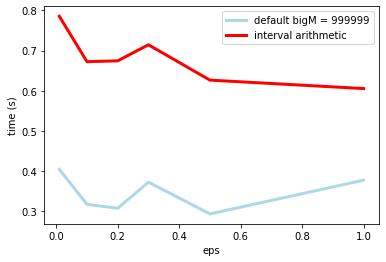

In [48]:
import matplotlib.pyplot as plt

fig_time_eps = plt.figure()
ax = fig_time_eps.add_subplot(111)
ax.plot([0.01, 0.1, 0.2, 0.3, 0.5, 1], [model_e001.Runtime, model_e01.Runtime, model_e02.Runtime, model_e03.Runtime, model_e05.Runtime, model_e1.Runtime], color='lightblue', linewidth=3, label='default bigM = 999999')
ax.plot([0.01, 0.1, 0.2, 0.3, 0.5, 1], [model_e001_ia.Runtime, model_e01_ia.Runtime, model_e02_ia.Runtime, model_e03_ia.Runtime, model_e05_ia.Runtime, model_e1_ia.Runtime], color='red', linewidth=3, label='interval arithmetic')
plt.xlabel('eps')
plt.ylabel('time (s)')
plt.legend()
plt.show()

## balance_scale_lin

In [49]:
path_bal = '../ExampleNNs/balance_scale_lin.h5'
kl_bal = KerasLoader()
kl_bal.load(path_bal)
kl_bal.get_overview()

Inputs: 4
Layer_1: 4 -- relu
Layer_2: 4 -- relu
Layer_3: 3 -- linear


In [50]:
bal_los = [1,1,1,1]
bal_his = [5,5,5,5]

### One permutation matrix

In [52]:
v_bal_1, c_bal_1 = encode_equivalence_from_file(path_bal, path_bal, bal_los, bal_his, 'one_ranking_top_1', 'one_ranking_top_1')
v_bal_2, c_bal_2 = encode_equivalence_from_file(path_bal, path_bal, bal_los, bal_his, 'one_ranking_top_2', 'one_ranking_top_2')

m_bal_1 = create_gurobi_model(v_bal_1, c_bal_1)
m_bal_2 = create_gurobi_model(v_bal_2, c_bal_2)

In [53]:
m_bal_1.optimize()
print('\n##########\n')
m_bal_2.optimize()

Optimize a model with 41 rows, 93 columns and 170 nonzeros
Model has 52 general constraints
Variable types: 66 continuous, 27 integer (27 binary)
Coefficient statistics:
  Matrix range     [2e-02, 1e+06]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 5e+00]
  RHS range        [2e-02, 1e+06]
Presolve added 67 rows and 54 columns
Presolve time: 0.04s
Presolved: 108 rows, 147 columns, 348 nonzeros
Presolved model has 55 SOS constraint(s)
Variable types: 73 continuous, 74 integer (74 binary)

Root relaxation: objective 0.000000e+00, 72 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   20          -    0.00000      -     -    0s
     0     0    0.00000    0   17          -    0.00000      -     -    0s
     0     0    0.00000    0   17          -    0.00000      -     -    0s
     0     2    0.00000    0   17          -  

In [54]:
expression.use_grb_native = False

m_bal_1_no_native = create_gurobi_model(v_bal_1, c_bal_1)
m_bal_2_no_native = create_gurobi_model(v_bal_2, c_bal_2)

m_bal_1_no_native.optimize()
print('\n##########\n')
m_bal_2_no_native.optimize()

Optimize a model with 209 rows, 93 columns and 524 nonzeros
Variable types: 66 continuous, 27 integer (27 binary)
Coefficient statistics:
  Matrix range     [2e-02, 1e+06]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 5e+00]
  RHS range        [2e-02, 1e+06]
Presolve removed 75 rows and 17 columns
Presolve time: 0.01s
Presolved: 134 rows, 76 columns, 380 nonzeros
Variable types: 53 continuous, 23 integer (23 binary)

Root relaxation: objective 0.000000e+00, 43 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    5          -    0.00000      -     -    0s
     0     0    0.00000    0   10          -    0.00000      -     -    0s
*    0     0               0       0.0000000    0.00000  0.00%     -    0s

Cutting planes:
  Gomory: 5
  Implied bound: 1
  MIR: 3
  Flow cover: 6

Explored 1 nodes (218 simplex iterations) in

As we can see, gurobi is able to prove equivalence, when the highest output of NN1 is amongst the top 2 outputs of NN2 (*while it doesn't say infeasible, when the gurobi native general constraints are used, it issues a warning, that a constraint is violated beyond tolerance*), but fails to prove equivalence for the one-hot vector of the top classification, despite NN1 and NN2 being the exact same NN.

The reason for this is again the feasibility tolerance in inequality:
~~~
 Gt0_0_1_b: - E_o_0_0 + E_o_0_1 - 999999.0001 E_d_0_1 >= -999999
~~~
`- E_o_0_0 + E_o_0_1 = -0.8394336409807153`, as `E_o_0_0` is the greatest output of NN2, because it is the same NN as NN1 and therefore it's greatest output gets also sorted to the top by the permutation matrix for NN1. With the value for `E_d_0_1` computed by gurobi we have:
~~~
-0.8394336409807153 + 999999.0001 * 0.9999991604655196 = -999999.0000000000312423
~~~
which again is well inside the feasibility tolerance.

As we will see below, this problem is mitigated when using interval arithmetic, as one no longer uses the very large default bound of `999999`, but instead `77.76960695470933` for this particular inequality, which is less severely affected by the not-exactly-integer value of `E_d_0_1`.

In [57]:
interval_arithmetic(c_bal_1)
interval_arithmetic(c_bal_2)

expression.use_grb_native = True

m_bal_1_ia = create_gurobi_model(v_bal_1, c_bal_1)
m_bal_2_ia = create_gurobi_model(v_bal_2, c_bal_2)

m_bal_1_ia.optimize()
print('\n##########\n')
m_bal_2_ia.optimize()

Optimize a model with 41 rows, 93 columns and 170 nonzeros
Model has 52 general constraints
Variable types: 66 continuous, 27 integer (27 binary)
Coefficient statistics:
  Matrix range     [2e-02, 8e+01]
  Objective range  [0e+00, 0e+00]
  Bounds range     [3e-01, 4e+01]
  RHS range        [2e-02, 8e+01]
Presolve added 99 rows and 0 columns
Presolve removed 0 rows and 5 columns
Presolve time: 0.01s
Presolved: 140 rows, 88 columns, 436 nonzeros
Variable types: 61 continuous, 27 integer (27 binary)

Root relaxation: objective 0.000000e+00, 66 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    7          -    0.00000      -     -    0s
     0     0    0.00000    0    7          -    0.00000      -     -    0s
     0     0    0.00000    0    7          -    0.00000      -     -    0s
     0     0    0.00000    0    7          -    0.0

When not using native gurobi methods, the one-hot comparison fails to prove equivalence, despite the tighter bound after application of interval arithmetic. 

This happens, because the second and third largest output of the NN are almost equal in the computed solution and thus the feasibility tolerance again comes into play.

Gurobi's algorithm somehow seems to encode either the ReLU constraints or the Binary Multiplication constraints differently and issues a warning about a violated constraint. (I don't know, which constraint was violated, as i haven't found a way to check for that).

In [59]:
expression.use_grb_native = False

m_bal_1_no_native_ia = create_gurobi_model(v_bal_1, c_bal_1)
m_bal_2_no_native_ia = create_gurobi_model(v_bal_2, c_bal_2)

m_bal_1_no_native_ia.optimize()
print('\n##########\n')
m_bal_2_no_native_ia.optimize()

Optimize a model with 209 rows, 93 columns and 524 nonzeros
Variable types: 66 continuous, 27 integer (27 binary)
Coefficient statistics:
  Matrix range     [2e-02, 8e+01]
  Objective range  [0e+00, 0e+00]
  Bounds range     [3e-01, 4e+01]
  RHS range        [2e-02, 8e+01]
Presolve removed 71 rows and 17 columns
Presolve time: 0.01s
Presolved: 138 rows, 76 columns, 388 nonzeros
Variable types: 53 continuous, 23 integer (23 binary)

Root relaxation: objective 0.000000e+00, 41 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    1          -    0.00000      -     -    0s
     0     0    0.00000    0    9          -    0.00000      -     -    0s
     0     0    0.00000    0    8          -    0.00000      -     -    0s
     0     0    0.00000    0    8          -    0.00000      -     -    0s
     0     2    0.00000    0    8          

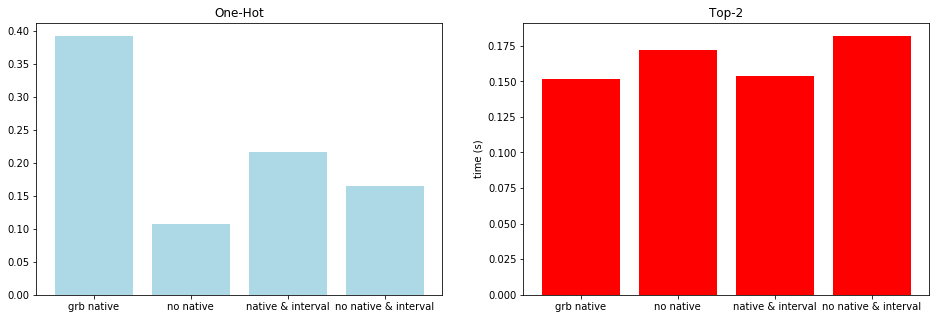

In [63]:
names = ['grb native', 'no native', 'native & interval', 'no native & interval']
values_one_hot = [m_bal_1.Runtime, m_bal_1_no_native.Runtime, m_bal_1_ia.Runtime, m_bal_1_no_native_ia.Runtime]
values_top_2 = [m_bal_2.Runtime, m_bal_2_no_native.Runtime, m_bal_2_ia.Runtime, m_bal_2_no_native_ia.Runtime]

fig_time_bal = plt.figure(figsize=(16,5))

p_one_hot = fig_time_bal.add_subplot(121)
p_one_hot.bar(names, values_one_hot, color='lightblue')
p_one_hot.title.set_text('One-Hot')

p_top_2 = fig_time_bal.add_subplot(122)
p_top_2.bar(names, values_top_2, color='red')
p_top_2.title.set_text('Top-2')

plt.ylabel('time (s)')
plt.show()

It is important to note, that only **native & interval** produced the correct results in the case of one-hot comparison

### Element-wise comparison of the outputs

Direct comparison of the outputs of `balance_scale_lin` with itself. Ideally gurobi should return *infeasible* in all cases.

We test exact equivalence of outputs as well as different values of epsilon.

In [71]:
v_bal_d0, c_bal_d0 = encode_equivalence_from_file(path_bal, path_bal, bal_los, bal_his, 'outputs', 'diff_zero')
v_bal_e1, c_bal_e1 = encode_equivalence_from_file(path_bal, path_bal, bal_los, bal_his, 'outputs', 'epsilon_1')
v_bal_e05, c_bal_e05 = encode_equivalence_from_file(path_bal, path_bal, bal_los, bal_his, 'outputs', 'epsilon_0.5')
v_bal_e03, c_bal_e03 = encode_equivalence_from_file(path_bal, path_bal, bal_los, bal_his, 'outputs', 'epsilon_0.3')
v_bal_e02, c_bal_e02 = encode_equivalence_from_file(path_bal, path_bal, bal_los, bal_his, 'outputs', 'epsilon_0.2')
v_bal_e01, c_bal_e01 = encode_equivalence_from_file(path_bal, path_bal, bal_los, bal_his, 'outputs', 'epsilon_0.1')
v_bal_e001, c_bal_e001 = encode_equivalence_from_file(path_bal, path_bal, bal_los, bal_his, 'outputs', 'epsilon_0.01')
v_bal_e0001, c_bal_e0001 = encode_equivalence_from_file(path_bal, path_bal, bal_los, bal_his, 'outputs', 'epsilon_0.001')
v_bal_e00001, c_bal_e00001 = encode_equivalence_from_file(path_bal, path_bal, bal_los, bal_his, 'outputs', 'epsilon_0.0001')
v_bal_e000001, c_bal_e000001 = encode_equivalence_from_file(path_bal, path_bal, bal_los, bal_his, 'outputs', 'epsilon_0.00001')

m_bal_d0 = create_gurobi_model(v_bal_d0, c_bal_d0)
m_bal_e1 = create_gurobi_model(v_bal_e1, c_bal_e1)
m_bal_e05 = create_gurobi_model(v_bal_e05, c_bal_e05)
m_bal_e03 = create_gurobi_model(v_bal_e03, c_bal_e03)
m_bal_e02 = create_gurobi_model(v_bal_e02, c_bal_e02)
m_bal_e01 = create_gurobi_model(v_bal_e01, c_bal_e01)
m_bal_e001 = create_gurobi_model(v_bal_e001, c_bal_e001)
m_bal_e0001 = create_gurobi_model(v_bal_e0001, c_bal_e0001)
m_bal_e00001 = create_gurobi_model(v_bal_e00001, c_bal_e00001)
m_bal_e000001 = create_gurobi_model(v_bal_e000001, c_bal_e000001)

In [72]:
m_bal_d0.optimize()
print('\n###############\n')
m_bal_e1.optimize()
print('\n###############\n')
m_bal_e05.optimize()
print('\n###############\n')
m_bal_e03.optimize()
print('\n###############\n')
m_bal_e02.optimize()
print('\n###############\n')
m_bal_e01.optimize()
print('\n###############\n')
m_bal_e001.optimize()
print('\n###############\n')
m_bal_e0001.optimize()
print('\n###############\n')
m_bal_e00001.optimize()
print('\n###############\n')
m_bal_e000001.optimize()

Optimize a model with 134 rows, 67 columns and 341 nonzeros
Variable types: 45 continuous, 22 integer (22 binary)
Coefficient statistics:
  Matrix range     [2e-02, 1e+06]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 5e+00]
  RHS range        [2e-02, 1e+06]
Presolve removed 42 rows and 10 columns
Presolve time: 0.00s
Presolved: 92 rows, 57 columns, 261 nonzeros
Variable types: 35 continuous, 22 integer (22 binary)

Root relaxation: objective 0.000000e+00, 24 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2          -    0.00000      -     -    0s
     0     0    0.00000    0    2          -    0.00000      -     -    0s
     0     2    0.00000    0    2          -    0.00000      -     -    0s
*  243     0               5       0.0000000    0.00000  0.00%   9.7    0s

Cutting planes:
  Cover: 4
  Implied bound:

Presolve time: 0.00s
Presolved: 92 rows, 57 columns, 261 nonzeros
Variable types: 35 continuous, 22 integer (22 binary)

Root relaxation: objective 0.000000e+00, 24 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2          -    0.00000      -     -    0s
     0     0    0.00000    0    4          -    0.00000      -     -    0s
     0     0    0.00000    0    4          -    0.00000      -     -    0s
     0     2    0.00000    0    4          -    0.00000      -     -    0s

Cutting planes:
  Learned: 1
  Gomory: 1
  Cover: 5
  Implied bound: 3
  MIR: 1

Explored 939 nodes (6375 simplex iterations) in 0.26 seconds
Thread count was 4 (of 4 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

###############

Optimize a model with 137 rows, 70 columns and 350 nonzeros
Variable type

We were able to prove equivalence for all tested values of `eps >= 0.0001`, we should not be able to surpass this value as i set the epsilon in the expression module to `0.0001`.

It is however surprising, that we didn't encounter numerical difficulties up to this epsilon.

Now try the same with interval arithmetic

In [73]:
interval_arithmetic(c_bal_d0)
interval_arithmetic(c_bal_e1)
interval_arithmetic(c_bal_e05)
interval_arithmetic(c_bal_e03)
interval_arithmetic(c_bal_e02)
interval_arithmetic(c_bal_e01)
interval_arithmetic(c_bal_e001)
interval_arithmetic(c_bal_e0001)
interval_arithmetic(c_bal_e00001)
interval_arithmetic(c_bal_e000001)

m_bal_d0_ia = create_gurobi_model(v_bal_d0, c_bal_d0)
m_bal_e1_ia = create_gurobi_model(v_bal_e1, c_bal_e1)
m_bal_e05_ia = create_gurobi_model(v_bal_e05, c_bal_e05)
m_bal_e03_ia = create_gurobi_model(v_bal_e03, c_bal_e03)
m_bal_e02_ia = create_gurobi_model(v_bal_e02, c_bal_e02)
m_bal_e01_ia = create_gurobi_model(v_bal_e01, c_bal_e01)
m_bal_e001_ia = create_gurobi_model(v_bal_e001, c_bal_e001)
m_bal_e0001_ia = create_gurobi_model(v_bal_e0001, c_bal_e0001)
m_bal_e00001_ia = create_gurobi_model(v_bal_e00001, c_bal_e00001)
m_bal_e000001_ia = create_gurobi_model(v_bal_e000001, c_bal_e000001)

In [74]:
m_bal_d0_ia.optimize()
print('\n###############\n')
m_bal_e1_ia.optimize()
print('\n###############\n')
m_bal_e05_ia.optimize()
print('\n###############\n')
m_bal_e03_ia.optimize()
print('\n###############\n')
m_bal_e02_ia.optimize()
print('\n###############\n')
m_bal_e01_ia.optimize()
print('\n###############\n')
m_bal_e001_ia.optimize()
print('\n###############\n')
m_bal_e0001_ia.optimize()
print('\n###############\n')
m_bal_e00001_ia.optimize()
print('\n###############\n')
m_bal_e000001_ia.optimize()

Optimize a model with 134 rows, 67 columns and 341 nonzeros
Variable types: 45 continuous, 22 integer (22 binary)
Coefficient statistics:
  Matrix range     [2e-02, 4e+01]
  Objective range  [0e+00, 0e+00]
  Bounds range     [3e-01, 4e+01]
  RHS range        [2e-02, 4e+01]
Presolve removed 42 rows and 10 columns
Presolve time: 0.00s
Presolved: 92 rows, 57 columns, 261 nonzeros
Variable types: 35 continuous, 22 integer (22 binary)

Root relaxation: objective 0.000000e+00, 21 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2          -    0.00000      -     -    0s
     0     0    0.00000    0    2          -    0.00000      -     -    0s
     0     2    0.00000    0    2          -    0.00000      -     -    0s
*  186     5               5       0.0000000    0.00000  0.00%   8.0    0s

Cutting planes:
  Cover: 3

Explored 199 no

  Bounds range     [3e-01, 4e+01]
  RHS range        [1e-02, 4e+01]
Presolve removed 45 rows and 13 columns
Presolve time: 0.00s
Presolved: 92 rows, 57 columns, 261 nonzeros
Variable types: 35 continuous, 22 integer (22 binary)

Root relaxation: objective 0.000000e+00, 21 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0    2          -    0.00000      -     -    0s
     0     0    0.00000    0    4          -    0.00000      -     -    0s
     0     0    0.00000    0    4          -    0.00000      -     -    0s
     0     0    0.00000    0    4          -    0.00000      -     -    0s
     0     2    0.00000    0    4          -    0.00000      -     -    0s

Cutting planes:
  Gomory: 1
  Cover: 10
  Implied bound: 2
  MIR: 1
  Flow cover: 3

Explored 669 nodes (5074 simplex iterations) in 0.23 seconds
Thread count was 4 (of 4 ava

<Figure size 432x288 with 0 Axes>

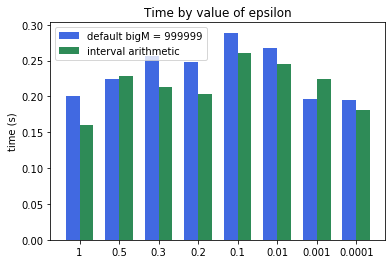

In [80]:
fig_time_eps_bal = plt.figure()

import numpy as np

val_eps_bal = [m.Runtime for m in [m_bal_e1, m_bal_e05, m_bal_e03, m_bal_e02, m_bal_e01, m_bal_e001, m_bal_e0001, m_bal_e00001]]
val_eps_bal_ia = [m.Runtime for m in [m_bal_e1_ia, m_bal_e05_ia, m_bal_e03_ia, m_bal_e02_ia, m_bal_e01_ia, m_bal_e001_ia, m_bal_e0001_ia, m_bal_e00001_ia]]

N = 8

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, val_eps_bal, width, color='royalblue', label='default bigM = 999999')

rects2 = ax.bar(ind+width, val_eps_bal_ia, width, color='seagreen', label='interval arithmetic')

# add some
ax.set_ylabel('time (s)')
ax.set_title('Time by value of epsilon')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('1', '0.5', '0.3', '0.2', '0.1', '0.01', '0.001', '0.0001') )

ax.legend()
plt.show()